In [20]:
# CSV 파일 읽어들이기
import pandas as pd
df1 = pd.read_csv('balanced_cwru.csv')
df2 = pd.read_csv('balanced_jnu.csv')
df3 = pd.read_csv('imbalanced_cwru.csv')
df4 = pd.read_csv('imbalanced_jnu.csv')


#df = pd.concat([df1, df2], axis=0)
#df.to_csv('result.csv', index=False)
#df
# df1과 df2를 열기준 concat


In [28]:
df=df3


task_conditions = [
    {"source": "CWRU_0", "target": "CWRU_1", "name": "T1(1730->1750)"},
    {"source": "CWRU_0", "target": "CWRU_2", "name": "T2(1730->1772)"},
    {"source": "CWRU_1", "target": "CWRU_0", "name": "T3(1750->1730)"},
    {"source": "CWRU_1", "target": "CWRU_2", "name": "T4(1750->1772)"},
    {"source": "CWRU_2", "target": "CWRU_0", "name": "T5(1772->1730)"},
    {"source": "CWRU_2", "target": "CWRU_1", "name": "T6(1772->1750)"},

    
]

# 데이터에 Task 이름 추가
for condition in task_conditions:
    df.loc[  (df["source"] == condition["source"]) & 
             (df["target"] == condition["target"]), "Task"] = condition["name"]

# 각 Task와 data_name, Name(방법론)별로 모델의 평균 성능 계산 (올바른 열 이름 사용)
corrected_grouped_results = df.groupby(["Task", "Name"]).agg({"last_target_acc": "mean"}).reset_index()
#corrected_grouped_results.sort_values("Task", inplace=True)

corrected_grouped_results['Task_Order'] = corrected_grouped_results['Task'].str.extract('(\d+)').astype(int)

# Task_Order를 기준으로 정렬
corrected_grouped_results_sorted = corrected_grouped_results.sort_values(['Task_Order', 'Task']).drop(columns=['Task_Order'])


corrected_grouped_results_sorted
#corrected_grouped_results.to_csv("exp_corrected.csv", index=False)


,Task,Name,last_target_acc
0,T1(1730->1750),ACDANN,0.85
1,T1(1730->1750),CDAN,0.85
2,T1(1730->1750),CNN,0.94
3,T1(1730->1750),CORAL,0.91
4,T1(1730->1750),DANN,0.92
5,T2(1730->1772),ACDANN,0.85
6,T2(1730->1772),CDAN,0.84
7,T2(1730->1772),CNN,0.93
8,T2(1730->1772),CORAL,0.88
9,T2(1730->1772),DANN,0.89


In [29]:



# task_conditions = [
#     {"source": "CWRU_0", "target": "CWRU_1", "name": "T1(1730->1750)"},
#     {"source": "CWRU_0", "target": "CWRU_2", "name": "T2(1730->1772)"},
#     {"source": "CWRU_1", "target": "CWRU_0", "name": "T4(1750->1730)"},
#     {"source": "CWRU_1", "target": "CWRU_2", "name": "T5(1750->1772)"},
#     {"source": "CWRU_2", "target": "CWRU_0", "name": "T7(1772->1730)"},
#     {"source": "CWRU_2", "target": "CWRU_1", "name": "T8(1772->1750)"},
#     {"source": "JNU_0", "target": "JNU_1", "name": "T9(600>800)"},
#     {"source": "JNU_0", "target": "JNU_2", "name": "T10(600->1000)"},
#     {"source": "JNU_1", "target": "JNU_0", "name": "T15(800->600)"},
#     {"source": "JNU_1", "target": "JNU_2", "name": "T16(800->1000)"},
#     {"source": "JNU_2", "target": "JNU_0", "name": "T17(1000->600)"},
#     {"source": "JNU_2", "target": "JNU_1", "name": "T18(1000->800)"},
    

    
# ]

# # 데이터에 Task 이름 추가
# for condition in task_conditions:
#     df.loc[  (df["source"] == condition["source"]) & 
#              (df["target"] == condition["target"]), "Task"] = condition["name"]

# # 각 Task와 data_name, Name(방법론)별로 모델의 평균 성능 계산 (올바른 열 이름 사용)
# corrected_grouped_results = df.groupby(["Task", "Name"]).agg({"last_target_acc": "mean"}).reset_index()
# #corrected_grouped_results.sort_values("Task", inplace=True)

# corrected_grouped_results['Task_Order'] = corrected_grouped_results['Task'].str.extract('(\d+)').astype(int)

# # Task_Order를 기준으로 정렬
# corrected_grouped_results_sorted = corrected_grouped_results.sort_values(['Task_Order', 'Task']).drop(columns=['Task_Order'])


# corrected_grouped_results_sorted
# #corrected_grouped_results.to_csv("exp_corrected.csv", index=False)


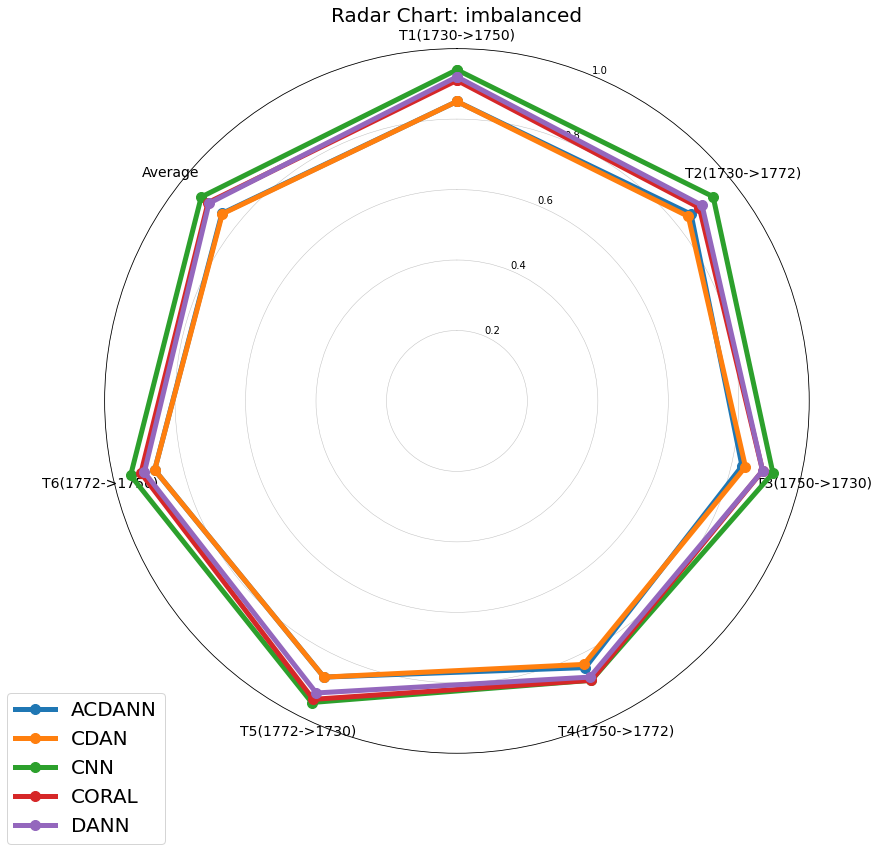

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plot_radar_chart(data, ax):
    # Name 목록 추출
    names = data['Name'].unique()
    
    # Task 목록 추출
    tasks = data['Task'].unique()
    
    # 모델별 평균 성능 계산
    model_means = data.groupby('Name')[['Task', 'last_target_acc']].apply(lambda x: x.set_index('Task').expanding().mean().reset_index())
    model_means = model_means.groupby('Name').last().reset_index()
    model_means['Task'] = 'Average'
    
    # 데이터에 모델별 평균 성능 추가
    data = pd.concat([data, model_means], ignore_index=True)
    
    # 업데이트된 Task 목록 추출
    tasks = np.append(tasks, 'Average')
    
    # 레이더 차트 그리기
    angles = np.linspace(0, 2 * np.pi, len(tasks), endpoint=False)
    angles = np.append(angles, angles[0])  # 마지막 각도 추가
    
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles)[:-1], labels=tasks, fontsize=14)
    
    for name in names:
        name_data = data[data['Name'] == name]
        values = [name_data[name_data['Task'] == task]['last_target_acc'].values[0] if len(name_data[name_data['Task'] == task]) > 0 else 0 for task in tasks]
        values = np.append(values, values[0])  # 마지막 값 추가
        
        #ax.plot(angles, values, linewidth=3, linestyle='solid', label=name)
        ax.plot(angles, values, linewidth=5, linestyle='solid', label=name, marker='o', markersize=10)  # 마커 추가
    
    ax.set_ylim(0, 1)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=20)
    
    ax.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    ax.xaxis.grid(False)
# 두 개의 서브플롯 생성
fig, (ax1) = plt.subplots(1, 1, figsize=(24, 12), subplot_kw=dict(polar=True))
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12), subplot_kw=dict(polar=True))

# 첫 번째 레이더 차트 그리기
plot_radar_chart(corrected_grouped_results_sorted, ax1)
ax1.set_title('Radar Chart: imbalanced', size=20)

# 두 번째 레이더 차트 그리기
# plot_radar_chart(corrected_grouped_results_sorted, ax2)
# ax2.set_title('Radar Chart: HUST FFT Input', size=20)

plt.tight_layout()
plt.show()

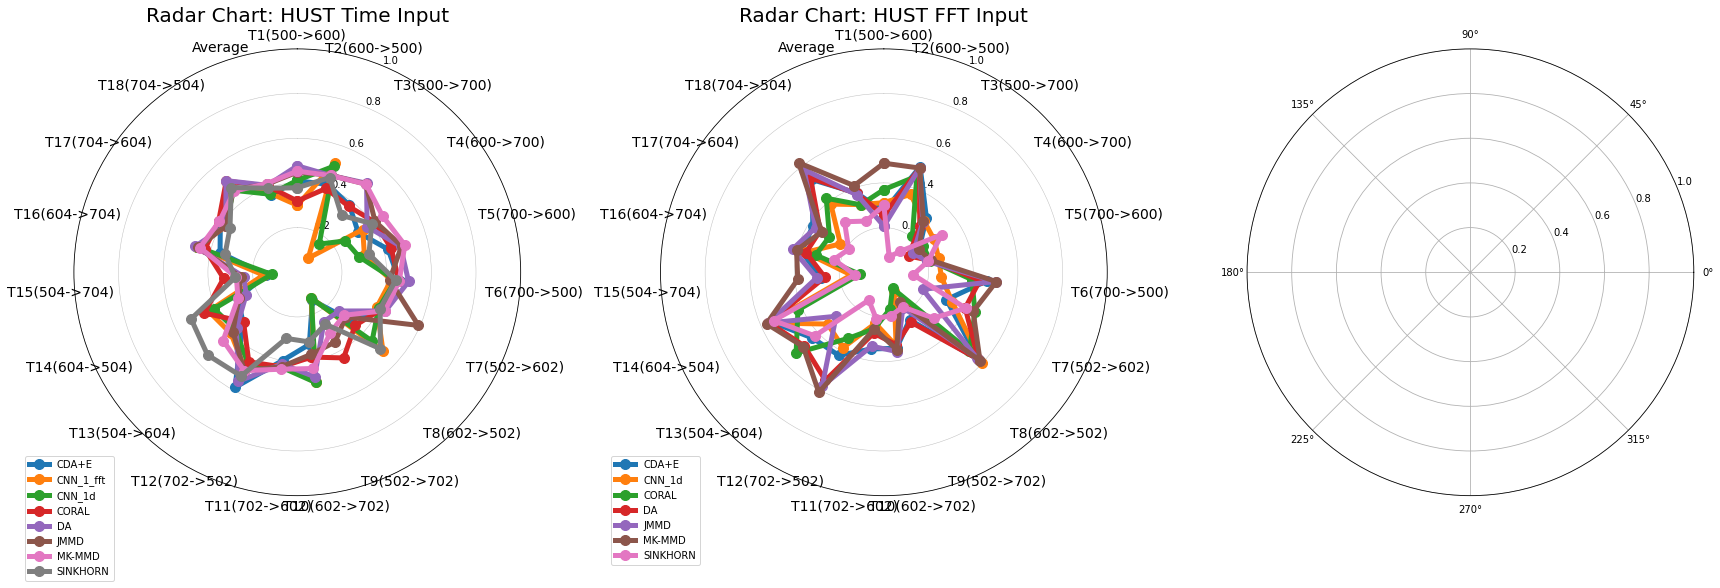

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plot_radar_chart(data, ax):
    # Name 목록 추출
    names = data['Name'].unique()
    
    # Task 목록 추출
    tasks = data['Task'].unique()
    
    # 모델별 평균 성능 계산
    model_means = data.groupby('Name')[['Task', 'Target acc']].apply(lambda x: x.set_index('Task').expanding().mean().reset_index())
    model_means = model_means.groupby('Name').last().reset_index()
    model_means['Task'] = 'Average'
    
    # 데이터에 모델별 평균 성능 추가
    data = pd.concat([data, model_means], ignore_index=True)
    
    # 업데이트된 Task 목록 추출
    tasks = np.append(tasks, 'Average')
    
    # 레이더 차트 그리기
    angles = np.linspace(0, 2 * np.pi, len(tasks), endpoint=False)
    angles = np.append(angles, angles[0])  # 마지막 각도 추가
    
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles)[:-1], labels=tasks, fontsize=14)
    
    for name in names:
        name_data = data[data['Name'] == name]
        values = [name_data[name_data['Task'] == task]['Target acc'].values[0] if len(name_data[name_data['Task'] == task]) > 0 else 0 for task in tasks]
        values = np.append(values, values[0])  # 마지막 값 추가
        
        #ax.plot(angles, values, linewidth=3, linestyle='solid', label=name)
        ax.plot(angles, values, linewidth=5, linestyle='solid', label=name, marker='o', markersize=10)  # 마커 추가
    
    ax.set_ylim(0, 1)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=10)
    
    ax.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    ax.xaxis.grid(False)
# 두 개의 서브플롯 생성
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(24, 12), subplot_kw=dict(polar=True))

# 첫 번째 레이더 차트 그리기
plot_radar_chart(df_hust, ax1)
ax1.set_title('Radar Chart: HUST Time Input', size=20)

# 두 번째 레이더 차트 그리기
plot_radar_chart(df_hust_fft, ax2)
ax2.set_title('Radar Chart: HUST FFT Input', size=20)


#plot_radar_chart(df_hust_T_fft, ax3)
#ax2.set_title('Radar Chart: HUST time and FFT Input', size=20)
# 초기 수도레이블을 머린러닝 모델의 성능을 비교하는 레이더 차트
plt.tight_layout()
plt.show()

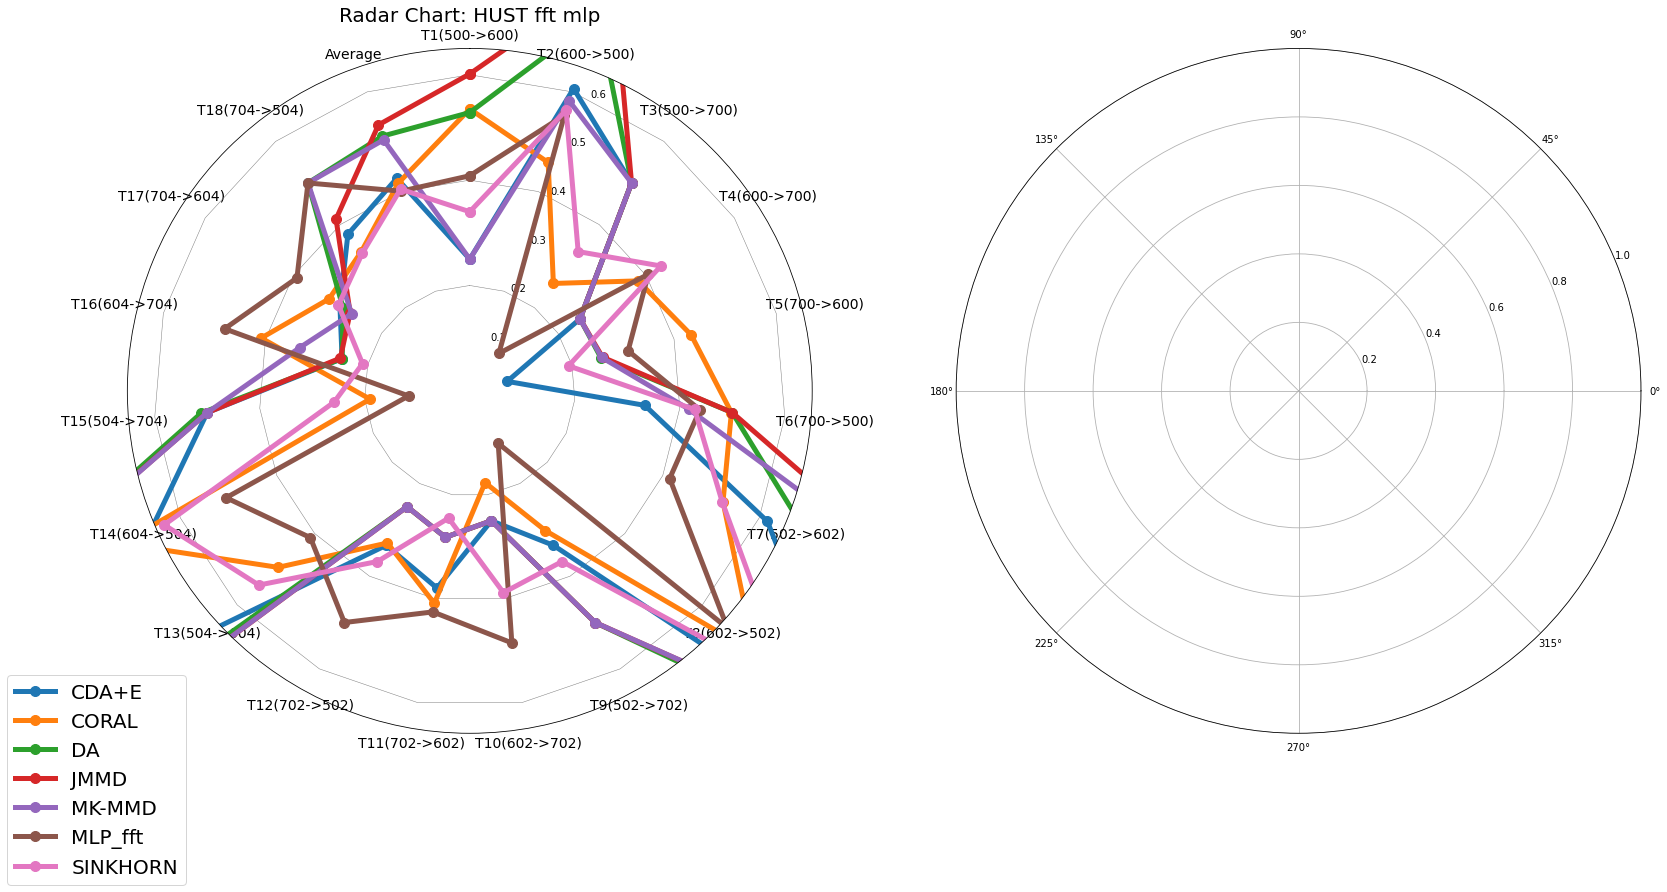

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plot_radar_chart(data, ax):
    # Name 목록 추출
    names = data['Name'].unique()
    
    # Task 목록 추출
    tasks = data['Task'].unique()
    
    # 모델별 평균 성능 계산
    model_means = data.groupby('Name')[['Task', 'Target acc']].apply(lambda x: x.set_index('Task').expanding().mean().reset_index())
    model_means = model_means.groupby('Name').last().reset_index()
    model_means['Task'] = 'Average'
    
    # 데이터에 모델별 평균 성능 추가
    data = pd.concat([data, model_means], ignore_index=True)
    
    # 업데이트된 Task 목록 추출
    tasks = np.append(tasks, 'Average')
    
    # 레이더 차트 그리기
    angles = np.linspace(0, 2 * np.pi, len(tasks), endpoint=False).tolist()
    angles += angles[:1]  # 마지막 각도 추가하여 폐쇄형 다각형 만들기
    
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    # 다각형 내부 그리드 그리기
    for i in range(1, 6):  # 5개 레벨의 그리드를 그립니다. 레벨 수는 필요에 따라 조정할 수 있습니다.
        ax.plot(angles, [i * 0.2] * len(angles), '-', color="gray", lw=0.5)  # 다각형 그리드
    
    ax.set_thetagrids(np.degrees(angles[:-1]), labels=tasks, fontsize=14)
    
    for name in names:
        name_data = data[data['Name'] == name]
        values = [name_data[name_data['Task'] == task]['Target acc'].values[0] if len(name_data[name_data['Task'] == task]) > 0 else 0 for task in tasks]
        values += values[:1]  # 첫 번째 값을 마지막에 추가하여 폐쇄형 다각형 데이터 포인트 만들기
        ax.plot(angles, values, linewidth=5, linestyle='solid', label=name, marker='o', markersize=10)  # 마커 추가
       # ax.fill(angles, values, alpha=0.1)
    
    ax.set_ylim(0, 0.65)  # 적절한 최대값으로 설정
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=20)
    
    ax.grid(False) 
# 두 개의 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12), subplot_kw=dict(polar=True))

# 첫 번째 레이더 차트 그리기
plot_radar_chart(corrected_grouped_results_sorted, ax1)
ax1.set_title('Radar Chart: HUST fft mlp', size=20)

# 두 번째 레이더 차트 그리기
# plot_radar_chart(df_hust_fft, ax2)
# ax2.set_title('Radar Chart: HUST FFT Input', size=20)

plt.tight_layout()
plt.show()

[0.39947917 0.41395833 0.40837937 0.51       0.39971188 0.36635417
 0.22322917 0.42770833 0.39162234 0.48416667 0.45677083 0.35270833
 0.37375    0.40427083 0.44916667 0.43381676 0.37260417 0.25260417
 0.39947917]


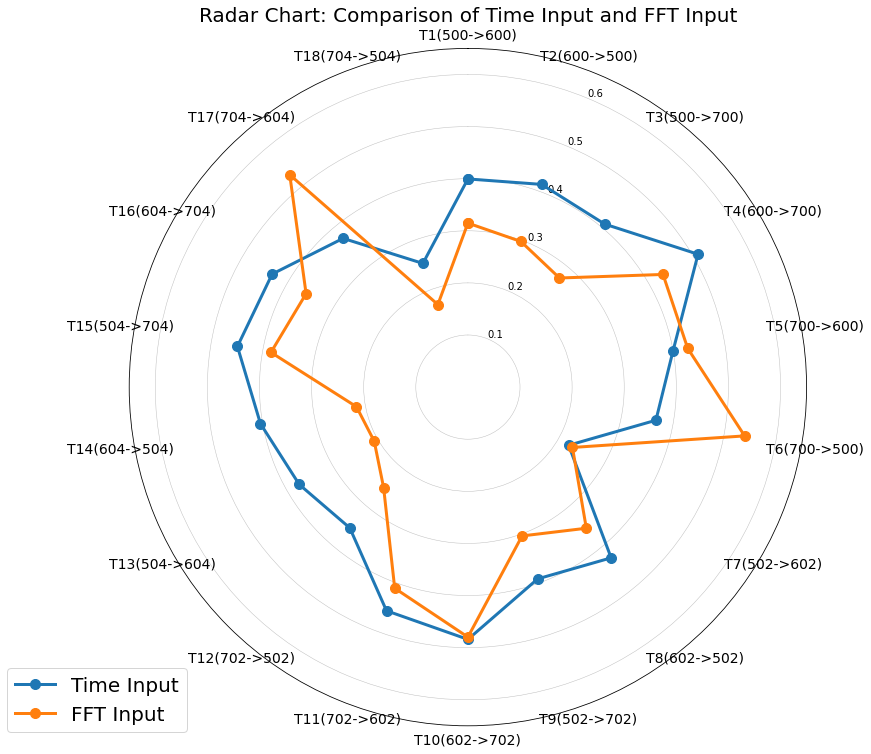

In [30]:
def plot_radar_chart(data1, data2, ax):
    # Task 목록 추출
    tasks = data1['Task'].unique()

    # 데이터 인풋 형태별 Task별 모든 모델의 평균 성능 계산
    task_means1 = data1.groupby('Task')['Target acc'].mean().reset_index()
    task_means2 = data2.groupby('Task')['Target acc'].mean().reset_index()
    

    # 레이더 차트 그리기
    angles = np.linspace(0, 2 * np.pi, len(tasks), endpoint=False)
    angles = np.append(angles, angles[0])  # 마지막 각도 추가

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles)[:-1], labels=tasks, fontsize=14)

    values1 = np.append(task_means1['Target acc'].values, task_means1['Target acc'].values[0])  # 마지막 값 추가
    values2 = np.append(task_means2['Target acc'].values, task_means2['Target acc'].values[0])  # 마지막 값 추가
    
    
    ax.plot(angles, values1, linewidth=3, linestyle='solid', label='Time Input',marker='o', markersize=10)
    
    ax.plot(angles, values2, linewidth=3, linestyle='solid', label='FFT Input',marker='o', markersize=10)
    
    

    ax.set_ylim(0, 0.65)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=20)
    ax.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    ax.xaxis.grid(False)
    print(values1)
# 레이더 차트 그리기
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
plot_radar_chart(df_hust, df_hust_fft, ax)
ax.set_title('Radar Chart: Comparison of Time Input and FFT Input', size=20)

plt.tight_layout()
plt.show()

NameError: name 'df_hust_T_fft' is not defined

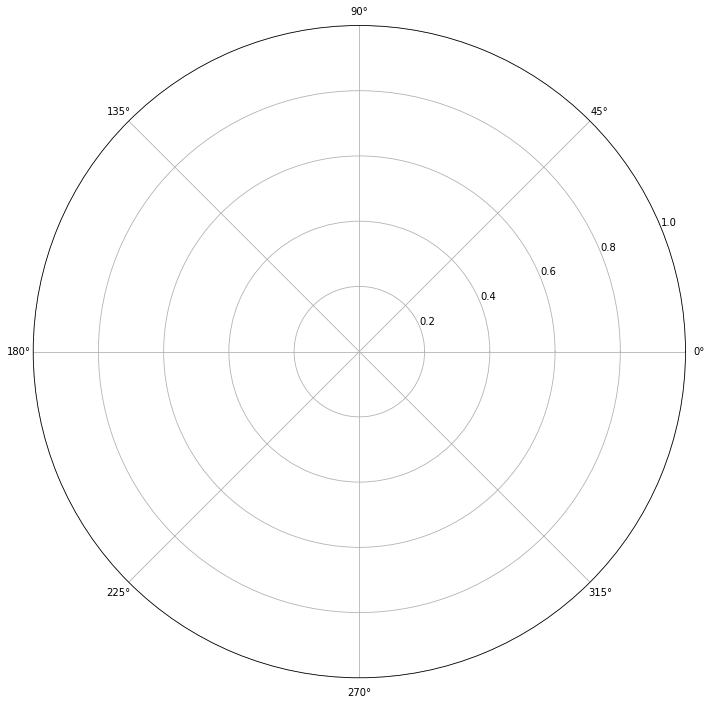

In [18]:
def plot_radar_chart(data1, data2,data3, ax):
    # Task 목록 추출
    tasks = data1['Task'].unique()

    # 데이터 인풋 형태별 Task별 모든 모델의 평균 성능 계산
    task_means1 = data1.groupby('Task')['Target acc'].mean().reset_index()
    task_means2 = data2.groupby('Task')['Target acc'].mean().reset_index()
    task_means3 = data3.groupby('Task')['Target acc'].mean().reset_index()

    # 레이더 차트 그리기
    angles = np.linspace(0, 2 * np.pi, len(tasks), endpoint=False)
    angles = np.append(angles, angles[0])  # 마지막 각도 추가

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles)[:-1], labels=tasks, fontsize=14)

    values1 = np.append(task_means1['Target acc'].values, task_means1['Target acc'].values[0])  # 마지막 값 추가
    values2 = np.append(task_means2['Target acc'].values, task_means2['Target acc'].values[0])  # 마지막 값 추가
    values3 = np.append(task_means3['Target acc'].values, task_means3['Target acc'].values[0])  # 마지막 값 추가
    
    ax.plot(angles, values1, linewidth=3, linestyle='solid', label='Time Input',marker='o', markersize=10)
    
    ax.plot(angles, values2, linewidth=3, linestyle='solid', label='FFT Input',marker='o', markersize=10)
    
    ax.plot(angles, values3, linewidth=3, linestyle='solid', label='Time and FFT Input',marker='o', markersize=10)

    ax.set_ylim(0, 0.65)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=20)
    ax.grid(True, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
    ax.xaxis.grid(False)

# 레이더 차트 그리기
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
plot_radar_chart(df_hust, df_hust_fft,df_hust_T_fft, ax)
ax.set_title('Radar Chart: Comparison of Time Input and FFT Input', size=20)

plt.tight_layout()
plt.show()